<B>Link to dataset >></B> https://www.kaggle.com/datasets/kaggle/sf-salaries?datasetId=14&sortBy=voteCount&select=Salaries.csv

<B>Import libiraries >>

In [32]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

<B>Import Data >>

In [137]:
conn = sqlite3.connect('database.sqlite')

data = pd.read_sql('select * from sqlite_master where type="table"',conn)
data

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...


<B>Fetch Salaries table>>

In [47]:
Salaries = pd.read_sql('select * from Salaries',conn)
Salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,


<B>EDA >>

In [48]:
Salaries['JobTitle'].nunique()

2159

In [49]:
Salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          148654 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             148654 non-null  object 
 11  Agency            148654 non-null  object 
 12  Status            148654 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 14.7+ MB


<br>there are rows
   contain this value 'Not Provided' in these columns
   ,so we will replace it with nan values

In [50]:
Salaries = Salaries.replace('Not Provided', np.nan)

In [52]:
Salaries.describe()

,Id,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
count,148654.000000,148650.000000,148650.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,5066.059886,3648.767297,74768.321972,93692.554811,2012.522643
std,42912.857795,11454.380559,8056.601866,50517.005274,62793.533483,1.117538
min,1.000000,-0.010000,-7058.590000,-618.130000,-618.130000,2011.000000
25%,37164.250000,0.000000,0.000000,36168.995000,44065.650000,2012.000000
50%,74327.500000,0.000000,811.270000,71426.610000,92404.090000,2013.000000
75%,111490.750000,4658.175000,4236.065000,105839.135000,132876.450000,2014.000000
max,148654.000000,245131.880000,400184.250000,567595.430000,567595.430000,2014.000000


<br><i>what is the average BasePay ??

In [55]:
avg_basePay = pd.read_sql('select AVG(BasePay) from Salaries',conn)
avg_basePay

,AVG(BasePay)
0,66053.729288


<br><i>what is the highest amount of the TotalPay ??

In [60]:
Max_Overtime = pd.read_sql('select MAX(TotalPay) from Salaries',conn)
Max_Overtime

,MAX(TotalPay)
0,567595.43


<br><i>what is the TotalPay of ALBERT PARDINI (inclduding benefits)??

In [61]:
ALBERT_TotalPay = pd.read_sql('select TotalPayBenefits from Salaries where EmployeeName = "ALBERT PARDINI"'
                              ,conn)
ALBERT_TotalPay

,TotalPayBenefits
0,335279.91


<br><i>what is the name of the highest and lowest paid person??

In [70]:
Highest_paid = pd.read_sql('''select EmployeeName from Salaries where
                           TotalPayBenefits = (select MAX(TotalPayBenefits) from Salaries)''',conn)
Highest_paid

,EmployeeName
0,NATHANIEL FORD


In [71]:
Lowest_paid = pd.read_sql('''select EmployeeName from Salaries where
                           TotalPayBenefits = (select MIN(TotalPayBenefits) from Salaries)''',conn)
Lowest_paid

,EmployeeName
0,Joe Lopez


In [73]:
Lowest_paid_info = pd.read_sql('''select * from Salaries where
                           TotalPayBenefits = (select MIN(TotalPayBenefits) from Salaries)''',conn)
Lowest_paid_info

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0,0,-618.13,0,-618.13,-618.13,2014,,San Francisco,PT


In [76]:
#we notic that there is employees who do not take a salary or owe to the company
#we will count their number
Owe_emp = pd.read_sql('select Count(Id) from Salaries where TotalPayBenefits <= 0',conn)
Owe_emp

,Count(Id)
0,34


<br><i>what was the avarage of the TotalPay of all the employees per Year?? 

In [89]:
avg_salary_year = pd.read_sql('select Year,AVG(TotalPay) from Salaries GROUP BY Year',conn)
avg_salary_year

,Year,AVG(TotalPay)
0,2011,71744.103871
1,2012,74113.262265
2,2013,77611.443142
3,2014,75463.918140


<br><i>what are the most common jobs?? 


In [113]:
common_jobs = pd.read_sql('''select distinct(JobTitle) , Count(JobTitle) as count 
                          from Salaries 
                          GROUP BY JobTitle 
                          ORDER BY count DESC 
                          LIMIT 5''',conn)
common_jobs

,JobTitle,count
0,Transit Operator,7036
1,Special Nurse,4389
2,Registered Nurse,3736
3,Public Svc Aide-Public Works,2518
4,Police Officer 3,2421


<br><i>How many job titles were represented by only 1 person in 2013?? 

In [117]:
one_job_title = pd.read_sql('''select Count(JobTitle) from (
                            select JobTitle , Count(JobTitle) as count 
                            from Salaries 
                            where Year = 2013 
                            GROUP BY JobTitle 
                            HAVING count = 1)''',conn)
one_job_title

,Count(JobTitle)
0,202


<br><i>How many employees have the word Chief in their job title?? 

In [118]:
Chief_emp = pd.read_sql('select Count(EmployeeName) from Salaries where JobTitle like "%Chief%"',conn)
Chief_emp

,Count(EmployeeName)
0,627


<br><i>Is there is a correlation between (lenght of the job title string) and (salary)??

In [126]:
Salaries['titles_lenght']= Salaries['JobTitle'].apply(len)  
#apply fun is very useful when you want to perform functions and calcs on rows.
Salaries['titles_lenght']
Salaries[['titles_lenght','TotalPayBenefits']].corr()

,titles_lenght,TotalPayBenefits
titles_lenght,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


##### <u>Visualizing the correlation

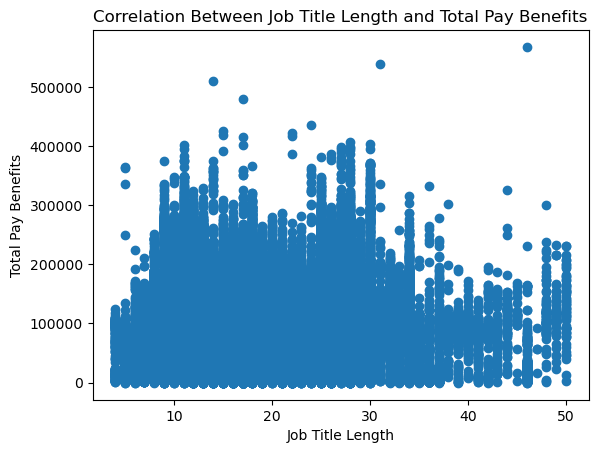

In [129]:
plt.scatter(Salaries['titles_lenght'], Salaries['TotalPayBenefits'])
plt.xlabel('Job Title Length')
plt.ylabel('Total Pay Benefits')
plt.title('Correlation Between Job Title Length and Total Pay Benefits')
plt.show()


#### Corr is very very small ,so their is no corr


<br><br> <B>visualizing the 5 number summary of TotalPayBenefits

Text(0.5, 1.0, '5 number summary of TotalPayBenefits')

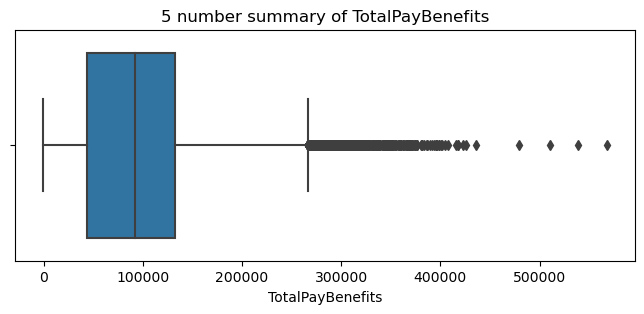

In [132]:
plt.figure(figsize=(8,3))
sns.boxplot(x=Salaries['TotalPayBenefits']).set_title("5 number summary of TotalPayBenefits")

### Insight:
The most of employees receive a wage with approximately 100000 per year,
The number of employees that receive a wage with above 400000 is very small.

<br><i>so, what is the title of these people who take more than 400000??

In [135]:
Title = pd.read_sql('select JobTitle from Salaries where TotalPayBenefits > 400000',conn)
Title

,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,CAPTAIN III (POLICE DEPARTMENT)
2,"Lieutenant, Fire Suppression"
3,Chief of Police
4,"Chief, Fire Department"
5,"Battalion Chief, Fire Suppress"
6,Asst Med Examiner
7,Deputy Chief 3
8,Asst Med Examiner
9,Chief Investment Officer
